**Загрузка начальных данных, используемых библиотек. Просмотр значений**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import urllib
import json

In [21]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/PBW7aUHGuodFDA'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
df = pd.read_csv(download_url)
df

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [22]:
na_number = df.isna().sum()
na_number

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [23]:
df_types = df.dtypes
df_types

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [24]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/m0Z6QYNT46f9tQ'


final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
df2 = pd.read_csv(download_url)
df2

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [25]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/lsmdbYB0iM7p3w'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
df3 = pd.read_csv(download_url)
df3

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [26]:
df3.id_student.nunique()

23369

**Задание. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене)**

*Соединяем таблицу с данными об оценках в тестах с таблицей результатов оценок студентов.
По условию задания требуется отобрать только результаты по экзаменам. Дополнительно исключаем оценки студентов, получивших перезачет.*

In [27]:
df_assess_stud = df.merge(df3, on = 'id_assessment')
df_assess_stud = df_assess_stud.query('is_banked == 0 and assessment_type == "Exam"')
df_assess_stud

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52923,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
...,...,...,...,...,...,...,...,...,...,...
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0
95983,DDD,2014J,25368,Exam,NaN,100.0,653051,242,0,27.0


*Отбираем данные только по успешной сдаче. По условию успешная сдача - результат >= 40 баллов.*

In [28]:
df_assess_stud_exam_succ = df_assess_stud.query("score >= 40")
df_assess_stud_exam_succ

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
52928,CCC,2014B,24290,Exam,NaN,100.0,560494,230,0,92.0
...,...,...,...,...,...,...,...,...,...,...
95978,DDD,2014J,25368,Exam,NaN,100.0,652617,243,0,56.0
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0


*Считаем количество студентов, которые сдали успешно (сдали экзамен) только по 1 курсу.*

In [29]:
df_assess_stud_exam_succ.groupby('id_student', as_index = False).agg({'code_module':'nunique'}).query('code_module == 1').shape[0]

3805

**ОТВЕТ: Количество студентов, которые успешно сдали только один курс составляет 3805 человек.**

**ЗАДАНИЕ. Выяви самый сложный и самый простой экзамен: 
найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью.
завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен**

*Создадим столбец с показателем успешности сдачи экзамена студентом.*

In [30]:
df_assess_stud['success'] = np.where(df_assess_stud['score'] > 40, 1, 0)
df_assess_stud

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,success
52923,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0,0
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0,1
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0,1
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0,1
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0,1
...,...,...,...,...,...,...,...,...,...,...,...
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0,1
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0,1
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0,1
95983,DDD,2014J,25368,Exam,NaN,100.0,653051,242,0,27.0,0


*Сгруппируем данные по названию курсов и успешности сдачи экзамена. Далее на основе полученной таблице найдем ответ к заданию.*

In [31]:
df_success_table = df_assess_stud.groupby(['code_module', 'success'], as_index = False).agg({'score' : 'count'})
df_success_table

,code_module,success,score
0,CCC,0,270
1,CCC,1,1645
2,DDD,0,407
3,DDD,1,2637


In [32]:
finalized_CCC = df_success_table.iloc[1][2]/(df_success_table.iloc[0][2] + df_success_table.iloc[1][2])
finalized_DDD = df_success_table.iloc[3][2]/(df_success_table.iloc[2][2] + df_success_table.iloc[3][2])
finalized_CCC, finalized_DDD

(0.8590078328981723, 0.8662943495400789)

**ОТВЕТ: Самый сложный экзамен: 'CCC' с завершаемостью 0.859, самый простой экзамен 'DDD' с завершаемостью 0.866.**

**ЗАДАНИЕ: По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом)**

*Отбираем только успешные попытки сдачи экзаменов*

In [33]:
df_assess_stud_exam_success = df_assess_stud[df_assess_stud['success'] == 1]
df_assess_stud_exam_success

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,success
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0,1
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0,1
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0,1
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0,1
52928,CCC,2014B,24290,Exam,NaN,100.0,560494,230,0,92.0,1
...,...,...,...,...,...,...,...,...,...,...,...
95978,DDD,2014J,25368,Exam,NaN,100.0,652617,243,0,56.0,1
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0,1
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0,1
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0,1


*Группируем данные по названию курса и находим ответ к заданию.*

In [34]:
df_assess_stud_exam_success_date = df_assess_stud_exam_success.groupby(['code_module'], as_index = False).agg({'date_submitted' : 'mean'})
df_assess_stud_exam_success_date

,code_module,date_submitted
0,CCC,239.341033
1,DDD,238.020478


In [35]:
mean_date_submitted_CCC = df_assess_stud_exam_success_date.iloc[0][1]
mean_date_submitted_DDD = df_assess_stud_exam_success_date.iloc[1][1]
mean_date_submitted_CCC, mean_date_submitted_DDD

(239.34103343465046, 238.02047781569965)

**ОТВЕТ: Средний срок сдачи составляет: курс ССС: 239.4 дня с начала семестра, курс DDD 238 дней с начала семестра.**

**ЗАДАНИЕ. Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3)**

*Рассмотрим таблицу с данными о регистрации студентов*

In [36]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/Yse4Y6RJqg_WaA'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
df4 = pd.read_csv(download_url)
df4

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [37]:
na_number = df4.isna().sum()
na_number

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

*Сгруппируем данные по названию курса и найдем количество записавшихся на каждый из курсов студентов.
Далее определяем ТОП-3 саммых популярных курсов.*

In [38]:
df4.groupby(['code_module'], as_index = False).agg({'id_student' : 'count'}).sort_values(by = 'id_student')

,code_module,id_student
0,AAA,748
6,GGG,2534
4,EEE,2934
2,CCC,4434
3,DDD,6272
5,FFF,7762
1,BBB,7909


In [39]:
Top3_most_favourite = df4.groupby(['code_module'], as_index = False).agg({'id_student' : 'count'}).sort_values(by = 'id_student').tail(3)
Top3_most_favourite

,code_module,id_student
3,DDD,6272
5,FFF,7762
1,BBB,7909


*Строим столбцец, где 1 - студент не отменял регистрацию, 0 - студент отменил регистрацию*

In [40]:
df4['unregistered'] = np.where(df4['date_unregistration'] > 0, 0, 1)
df4

,code_module,code_presentation,id_student,date_registration,date_unregistration,unregistered
0,AAA,2013J,11391,-159.0,NaN,1
1,AAA,2013J,28400,-53.0,NaN,1
2,AAA,2013J,30268,-92.0,12.0,0
3,AAA,2013J,31604,-52.0,NaN,1
4,AAA,2013J,32885,-176.0,NaN,1
...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,1
32589,GGG,2014J,2645731,-23.0,NaN,1
32590,GGG,2014J,2648187,-129.0,NaN,1
32591,GGG,2014J,2679821,-49.0,101.0,0


*Группиреум данные по названию курса и столбцу с фактом отмены регистрации.*

In [41]:
df_registration_table = df4.groupby(['code_module', 'unregistered'], as_index = False).agg({'id_student' : 'count'})
df_registration_table

,code_module,unregistered,id_student
0,AAA,0,106
1,AAA,1,642
2,BBB,0,1389
3,BBB,1,6520
4,CCC,0,1448
5,CCC,1,2986
6,DDD,0,1639
7,DDD,1,4633
8,EEE,0,485
9,EEE,1,2449


*На основе полученной таблицы строим таблицу с суммарным числом записавшихся на курс 
и таблицу с числом студентов, которые отменили регистрацию.*

In [42]:
df_registration_table_sum = df_registration_table.groupby(['code_module'], as_index = False).agg({'id_student':'sum'})
df_registration_table_unregister = df_registration_table.query('unregistered == 0')
df_registration_table_sum

,code_module,id_student
0,AAA,748
1,BBB,7909
2,CCC,4434
3,DDD,6272
4,EEE,2934
5,FFF,7762
6,GGG,2534


In [43]:
df_registration_table_unregister

,code_module,unregistered,id_student
0,AAA,0,106
2,BBB,0,1389
4,CCC,0,1448
6,DDD,0,1639
8,EEE,0,485
10,FFF,0,1687
12,GGG,0,221


*Меняем названия столбцов*

In [44]:
df_registration_table_sum = df_registration_table_sum.rename(columns={'id_student': 'sum_students'})
df_registration_table_unregister = df_registration_table_unregister.rename(columns={'id_student': 'unregistered_students'})
df_registration_table_sum

,code_module,sum_students
0,AAA,748
1,BBB,7909
2,CCC,4434
3,DDD,6272
4,EEE,2934
5,FFF,7762
6,GGG,2534


In [45]:
df_registration_table_unregister

,code_module,unregistered,unregistered_students
0,AAA,0,106
2,BBB,0,1389
4,CCC,0,1448
6,DDD,0,1639
8,EEE,0,485
10,FFF,0,1687
12,GGG,0,221


*Соединяем 2 полученные таблицы и находим искомую величину оттока студентов.*

In [46]:
df_registr_final = df_registration_table_unregister.merge(df_registration_table_sum, on = 'code_module')
df_registr_final

,code_module,unregistered,unregistered_students,sum_students
0,AAA,0,106,748
1,BBB,0,1389,7909
2,CCC,0,1448,4434
3,DDD,0,1639,6272
4,EEE,0,485,2934
5,FFF,0,1687,7762
6,GGG,0,221,2534


In [47]:
df_registr_final['churn_rate'] = df_registr_final['unregistered_students']/df_registr_final['sum_students']
df_registr_final.sort_values(by = 'churn_rate', ascending = False).head(3)

,code_module,unregistered,unregistered_students,sum_students,churn_rate
2,CCC,0,1448,4434,0.326567
3,DDD,0,1639,6272,0.261320
5,FFF,0,1687,7762,0.217341


**ОТВЕТ: ТОП-3 Популярных курса: BBB, FFF, DDD. ТОП-3 курса по оттоку студентов: CCC, DDD, FFF.**

**ЗАДАНИЕ: Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.**

*Используем ранее полученную таблицу, отфильтрованную по факту сдачи экзамена с убранными значениями, в случае, если студент получил перезачет*

In [48]:
df_assess_stud['success'] = np.where(df_assess_stud['score'] > 40, 'yes', 'no')
df_assess_stud

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,success
52923,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0,no
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0,yes
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0,yes
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0,yes
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0,yes
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0,yes
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0,yes
95983,DDD,2014J,25368,Exam,NaN,100.0,653051,242,0,27.0,no


*Находим среднюю дату сдачи экзамена по для каждого семестра.*

In [49]:
df_assess_stud_cohorts = df_assess_stud.groupby(['code_presentation'],as_index = False).agg({'date_submitted':'mean'})
df_assess_stud_cohorts

,code_presentation,date_submitted
0,2013B,230.179402
1,2013J,239.505165
2,2014B,232.988985
3,2014J,243.674221


*По аналогии с заданием ранее строим таблицу с общим количеством студентов по семестру, далее таблицу только с успешной сдачей. Соединяем 2 таблицы, оставляем строки только с успешной сдачей.*

In [50]:
df_assess_stud_cohorts_churn = df_assess_stud.groupby(['code_presentation', 'success'],as_index=False).agg({'id_student':'nunique'})
df_assess_stud_cohorts_churn_sum = df_assess_stud.groupby(['code_presentation'],as_index=False).agg({'id_student':'nunique'})
df_assess_stud_cohorts_churn_sum

,code_presentation,id_student
0,2013B,602
1,2013J,968
2,2014B,1261
3,2014J,2068


In [51]:
df_final_cohorts = df_assess_stud_cohorts_churn.merge(df_assess_stud_cohorts_churn_sum, on = 'code_presentation')
df_final_cohorts = df_final_cohorts.query('success == "yes"')
df_final_cohorts['completion_rate'] = df_final_cohorts['id_student_x']/df_final_cohorts['id_student_y']
df_final_cohorts[['code_presentation', 'completion_rate']]

,code_presentation,completion_rate
1,2013B,0.794020
3,2013J,0.884298
5,2014B,0.887391
7,2014J,0.857834


*Прописываем функцию для построения семестрового анализа*

In [52]:
def semestr_analysis(dataset, timestamp, analyzed_parametr, function):
    return dataset.groupby([timestamp], as_index = False).agg({analyzed_parametr:function})

In [53]:
semestr_analysis(df_assess_stud, 'code_presentation', 'date_submitted', 'mean')

,code_presentation,date_submitted
0,2013B,230.179402
1,2013J,239.505165
2,2014B,232.988985
3,2014J,243.674221


**ОТВЕТ: 2013B - семестр с самой низкой завершаемостью, 2014J - семестр с самым долгим средним сроком сдачи курса.**	

**ЗАДАНИЕ: Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию.**

*Используем таблицу из предыдущего задания.*

In [54]:
df_assess_stud['success'] = np.where(df_assess_stud['score'] > 40, 1, 0)
df_assess_stud

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,success
52923,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0,0
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0,1
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0,1
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0,1
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0,1
...,...,...,...,...,...,...,...,...,...,...,...
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0,1
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0,1
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0,1
95983,DDD,2014J,25368,Exam,NaN,100.0,653051,242,0,27.0,0


*Группируем данные по id студента, при этом строим следующие столбцы:*
- средний балл студента;
- среднее время с начала курса, когда студент попробовал сдать экзамен;
- количество успешных попыток сдать экзамен;
- общее количество попыток сдать экзамен;
- количество курсов, на которых студент сдавал экзамен.

In [55]:
df_rfm = df_assess_stud.groupby(['id_student'], as_index=False).agg({'score':'mean', 'date_submitted':'mean', 'success':'sum', 'assessment_type':'count', 'code_module' : 'count'})
df_rfm = df_rfm.rename(columns={'score': 'mean_score', 'date_submitted':'mean_date_submitted','success' : 'successfull_attempts_count','assessment_type': 'attemps_count', 'code_module' : 'number_courses_exam'})
df_rfm

,id_student,mean_score,mean_date_submitted,successfull_attempts_count,attemps_count,number_courses_exam
0,23698,80.0,243.0,1,1,1
1,24213,58.0,236.0,1,1,1
2,27116,96.0,243.0,1,1,1
3,28046,40.0,237.0,0,1,1
4,28787,44.0,243.0,1,1,1
...,...,...,...,...,...,...
4628,2694886,69.0,236.0,1,1,1
4629,2694933,73.0,230.0,1,1,1
4630,2695608,73.0,237.0,1,1,1
4631,2697181,80.0,230.0,1,1,1


*Используя столбцы с количеством успешных попыток сдать экзамен и общим количеством попыток сдать экзамен
находим долю успешной сдачи экзаменов студентом*

In [56]:
df_rfm['completion_rate'] = df_rfm['successfull_attempts_count']/df_rfm['attemps_count']
df_rfm

,id_student,mean_score,mean_date_submitted,successfull_attempts_count,attemps_count,number_courses_exam,completion_rate
0,23698,80.0,243.0,1,1,1,1.0
1,24213,58.0,236.0,1,1,1,1.0
2,27116,96.0,243.0,1,1,1,1.0
3,28046,40.0,237.0,0,1,1,0.0
4,28787,44.0,243.0,1,1,1,1.0
...,...,...,...,...,...,...,...
4628,2694886,69.0,236.0,1,1,1,1.0
4629,2694933,73.0,230.0,1,1,1,1.0
4630,2695608,73.0,237.0,1,1,1,1.0
4631,2697181,80.0,230.0,1,1,1,1.0


*Как мы убедились, по количеству курсов студентов можно разделить на 2 группы
(применим данную информацию для rfm кластеризации далее)*

In [57]:
df_rfm.number_courses_exam.value_counts()

1    4307
2     326
Name: number_courses_exam, dtype: int64

*По успешности сдачи эксманов студенов можно разделить на 3 группы.
(применим данную информацию для rfm кластеризации далее)*

In [58]:
df_rfm.completion_rate.value_counts()

1.0    3961
0.0     639
0.5      33
Name: completion_rate, dtype: int64

*Для оценки распределения значений и выбора границ кластеров
по показателям "средний балл" и "среднее время сдачи" построим график плотности распределения distplot.*

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


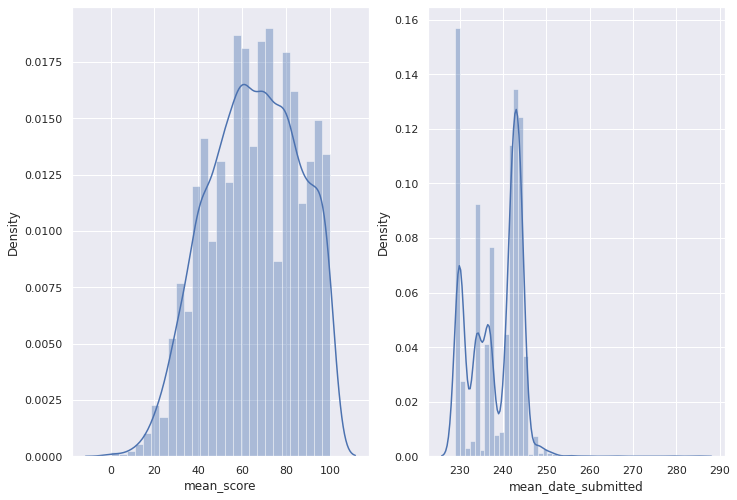

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax =plt.subplots(1,2)
sns.distplot(df_rfm['mean_score'], ax=ax[0])
sns.distplot(df_rfm['mean_date_submitted'], ax=ax[1])
fig.show()

In [60]:
df_rfm

,id_student,mean_score,mean_date_submitted,successfull_attempts_count,attemps_count,number_courses_exam,completion_rate
0,23698,80.0,243.0,1,1,1,1.0
1,24213,58.0,236.0,1,1,1,1.0
2,27116,96.0,243.0,1,1,1,1.0
3,28046,40.0,237.0,0,1,1,0.0
4,28787,44.0,243.0,1,1,1,1.0
...,...,...,...,...,...,...,...
4628,2694886,69.0,236.0,1,1,1,1.0
4629,2694933,73.0,230.0,1,1,1,1.0
4630,2695608,73.0,237.0,1,1,1,1.0
4631,2697181,80.0,230.0,1,1,1,1.0


*Граничные значения кластеров для показателей "доля успешной сдачи экзаменов"
и "количество курсов, по которым студент сдал экзамен" указаны выше.
На основании графиков выше выбираем следующие границы для кластеров:*

**Средний балл**:
- меньше 40 (студенты не сдавшие экзамен), 
- от 40 до 85 (студенты сдавшие экзамен и получившие оценки от 3 до 4,
- больше 85 - студенты "отличники"

**Среднее время сдачи**:
На графике мы видим три пика, которые целесообрано разделить на разные кластеры:
- меньше 235 дней - студент очень быстро сдал все зачеты и приступил к экзамену;
- от 235 дней до 243 - обычное время сдачи зачетов и получения допуска к экзамену;
- больше 243 дней - студент получал необходимые для сдачи экзамена зачеты.

*На основании описания выше пишем функцию, по которой каждому студенту присваивается соответстующий rfm номер*

In [61]:
def rfm_number(row):
    rfm_number = ''
    if row['mean_date_submitted'] <= 235:
         rfm_number += '3'
    if row['mean_date_submitted'] <=  243 and row['mean_date_submitted'] > 235:
        rfm_number += '2'
    if row['mean_date_submitted'] > 243:
        rfm_number += '1'
    if row['completion_rate'] == 0:
         rfm_number += '1'
    if row['completion_rate'] ==  0.5:
        rfm_number += '2'
    if row['completion_rate'] == 1:
        rfm_number += '3'
    if row['mean_score'] < 40:
         rfm_number += '1'
    if row['mean_score'] <  85 and row['mean_score'] >= 40:
        rfm_number += '2'
    if row['mean_score'] >= 85:
        rfm_number += '3'
    if row['number_courses_exam'] == 2:
        rfm_number += '2'
    if row['number_courses_exam'] == 1:
        rfm_number += '1'
    return rfm_number    

In [62]:
df_rfm['rfm'] = df_rfm.apply(lambda x: rfm_number(x), axis = 1)
df_rfm

,id_student,mean_score,mean_date_submitted,successfull_attempts_count,attemps_count,number_courses_exam,completion_rate,rfm
0,23698,80.0,243.0,1,1,1,1.0,2321
1,24213,58.0,236.0,1,1,1,1.0,2321
2,27116,96.0,243.0,1,1,1,1.0,2331
3,28046,40.0,237.0,0,1,1,0.0,2121
4,28787,44.0,243.0,1,1,1,1.0,2321
...,...,...,...,...,...,...,...,...
4628,2694886,69.0,236.0,1,1,1,1.0,2321
4629,2694933,73.0,230.0,1,1,1,1.0,3321
4630,2695608,73.0,237.0,1,1,1,1.0,2321
4631,2697181,80.0,230.0,1,1,1,1.0,3321


**Пример использования rfm харакетиристик студентов для получения требуемых выборок.**

*Найдем число "великолепных" студентов, которые бытро сдали зачеты, получили 5 на экзамене, бех неудачных попыток сдать экзамен*

In [63]:
df_brilliant_students = df_rfm.query('rfm == "3331" or rfm == "3332"')
df_brilliant_students

,id_student,mean_score,mean_date_submitted,successfull_attempts_count,attemps_count,number_courses_exam,completion_rate,rfm
8,29764,94.0,230.0,1,1,1,1.0,3331
25,46605,98.0,230.0,1,1,1,1.0,3331
28,49119,100.0,234.0,1,1,1,1.0,3331
29,50476,87.0,234.0,1,1,1,1.0,3331
59,70381,90.0,234.0,1,1,1,1.0,3331
...,...,...,...,...,...,...,...,...
4572,2639451,91.0,233.0,1,1,1,1.0,3331
4596,2665399,96.0,230.0,1,1,1,1.0,3331
4610,2680742,86.0,230.0,1,1,1,1.0,3331
4624,2692327,88.0,234.0,1,1,1,1.0,3331


*найдем число "великолепных" студентов, которые сдали экзамены по 2-м курсам*

In [64]:
df_brilliant_students_two_courses_completed = df_rfm.query('rfm == "3332"')
df_brilliant_students_two_courses_completed

,id_student,mean_score,mean_date_submitted,successfull_attempts_count,attemps_count,number_courses_exam,completion_rate,rfm
892,445917,98.0,233.5,2,2,2,1.0,3332
1027,480929,85.0,230.5,2,2,2,1.0,3332
1172,502554,96.0,229.5,2,2,2,1.0,3332
1328,522312,86.0,233.5,2,2,2,1.0,3332
1449,536170,93.5,230.0,2,2,2,1.0,3332
1544,544594,91.5,233.5,2,2,2,1.0,3332
1546,544839,89.0,230.5,2,2,2,1.0,3332
1818,560311,86.5,232.0,2,2,2,1.0,3332
2663,605266,90.0,233.5,2,2,2,1.0,3332
2674,605703,88.0,233.5,2,2,2,1.0,3332


In [65]:
df_brilliant_students_two_courses_completed.shape[0]

12

*найдем число студентов сдавших экзамен по двум курсам без неудачных попыток сдачи экзамена*

In [66]:
df_students_two_courses_completed = df_rfm[df_rfm["rfm"].str.match("\d{1}3\d{1}2")]
df_students_two_courses_completed

,id_student,mean_score,mean_date_submitted,successfull_attempts_count,attemps_count,number_courses_exam,completion_rate,rfm
72,80329,72.0,243.5,2,2,2,1.0,1322
74,80868,64.0,240.5,2,2,2,1.0,2322
102,105523,56.5,239.0,2,2,2,1.0,2322
122,123598,79.0,243.0,2,2,2,1.0,2322
125,126394,79.0,237.5,2,2,2,1.0,2322
...,...,...,...,...,...,...,...,...
4467,2498388,75.5,234.0,2,2,2,1.0,3322
4546,2609908,71.5,233.0,2,2,2,1.0,3322
4561,2622441,63.5,242.5,2,2,2,1.0,2322
4571,2639310,75.0,235.5,2,2,2,1.0,2322


*На основании разбивки ниже определяем, что "типовой" студент имеет следующие характеристики:*
- время допуска к экзамену от 235 до 245 дней, сдача 1-го экзамена с 1-го раза с оценкой 40 - 85 баллов;

*При этом:*
- подавляющее большинство студентов сдает экзамены успешно;
- доля студентов, сдающих 2 экзамена невелика.

**ОТВЕТ: На основании rfm разбивки разбивки каждому студенту присвоен номер, по которому, можно определить основные характеристики каждого студента**

In [67]:
df_rfm.rfm.value_counts()

2321    1423
3321     928
1321     504
2331     296
3331     262
1331     260
2111     238
3111     178
2322     128
1111     117
2332      66
3322      47
3121      43
2121      36
1121      22
1322      20
2222      17
1332      15
3332      12
3222      10
2212       4
3112       3
2112       2
1212       1
1222       1
Name: rfm, dtype: int64